In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import io
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb


#Métricas
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
#Naive Bayes
from sklearn.naive_bayes import GaussianNB


Cargar y leer información del dataset

In [ ]:
dataframe=pd.read_csv("/content/bank-full.csv", sep=";")

Revisar si el dataframe contiene nulos

In [ ]:
dataframe.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Información del dataframe

In [ ]:
dataframe.info() # información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Visualizar algunas filas del dataframe

In [ ]:
dataframe.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Obtener datos básicos

In [ ]:
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Verificar distribuciones de probabilidad de las columnas numéricas

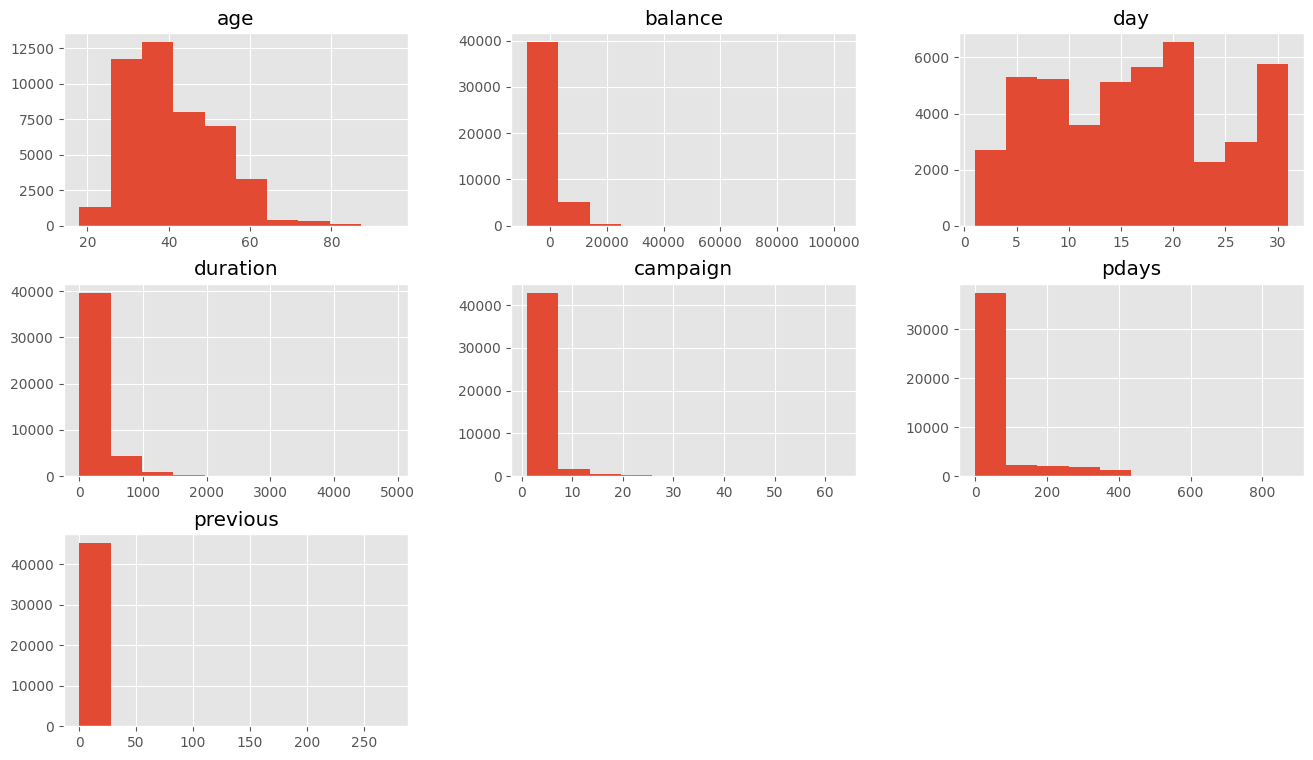

In [ ]:
numerico = dataframe.select_dtypes(np.number)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
numerico.hist()
plt.show()

Se usará la prueba de Agostino para comprobar 


In [ ]:
normal=[]
noNormal=[]
for i in numerico:
  datosColumna = numerico[i]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(i)
  else:
    noNormal.append(i)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Correlación de columnas numéricas

<Axes: title={'center': 'Bank'}>

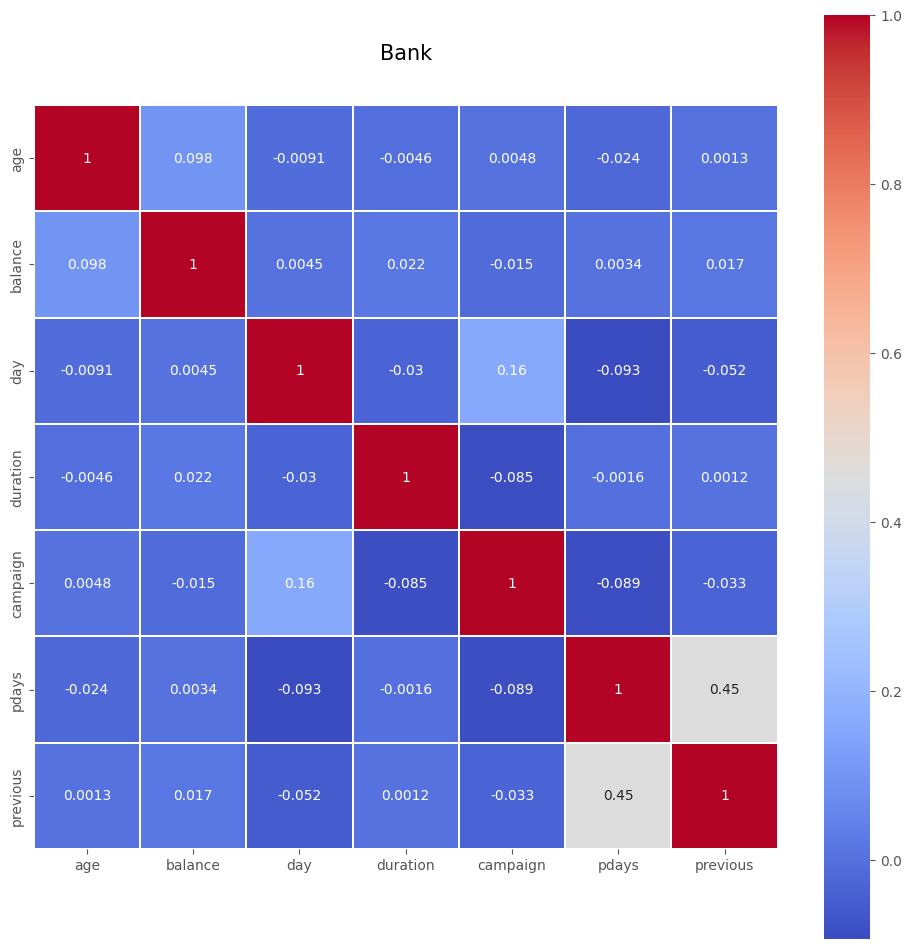

In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Bank', y=1.05, size=15)
sb.heatmap(numerico.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Histogramas de datos categoricos

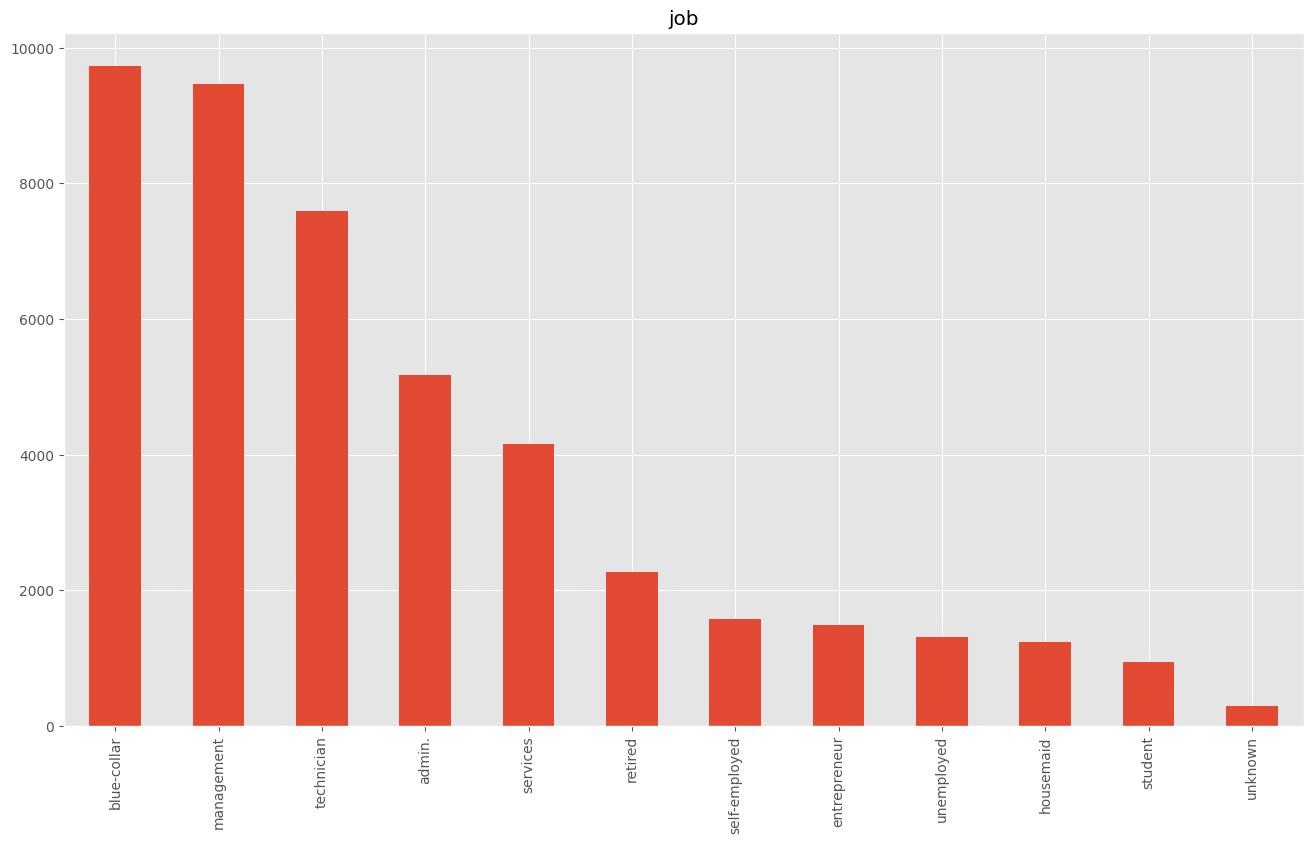

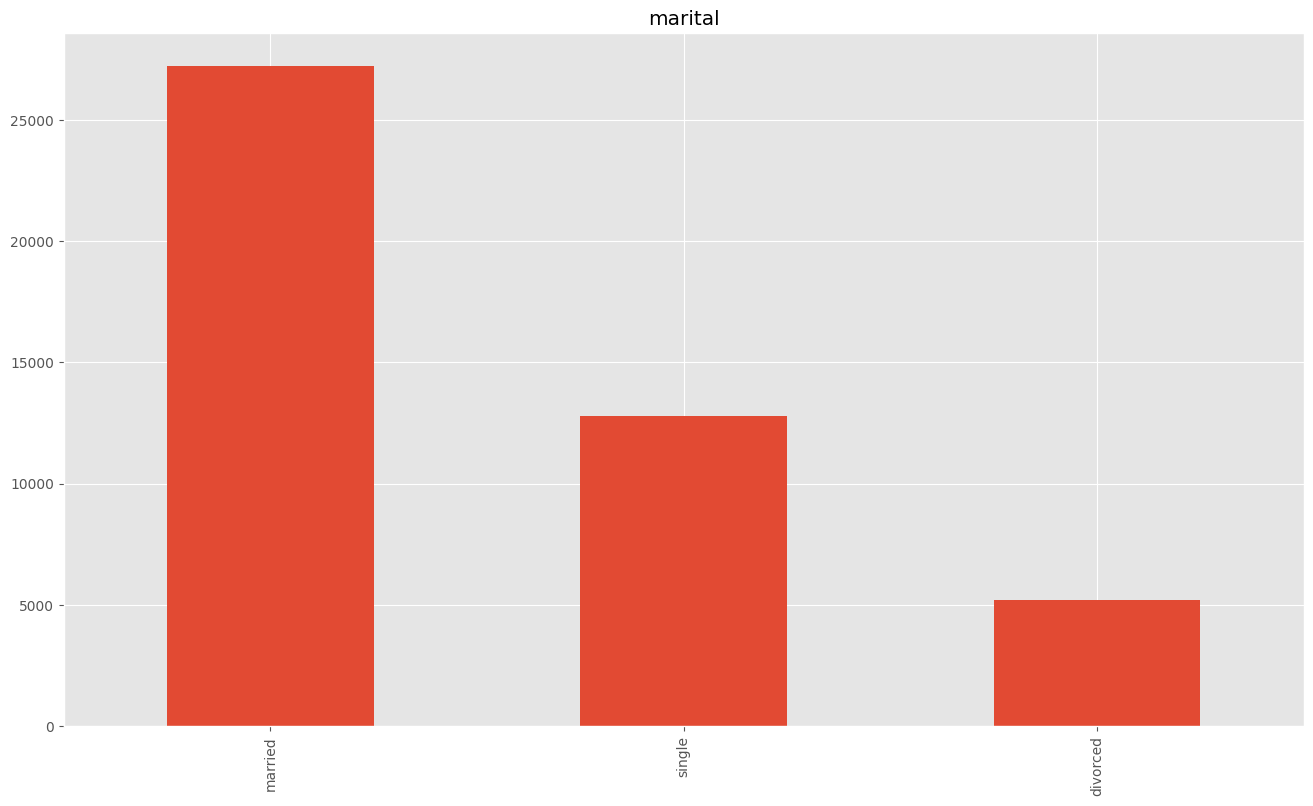

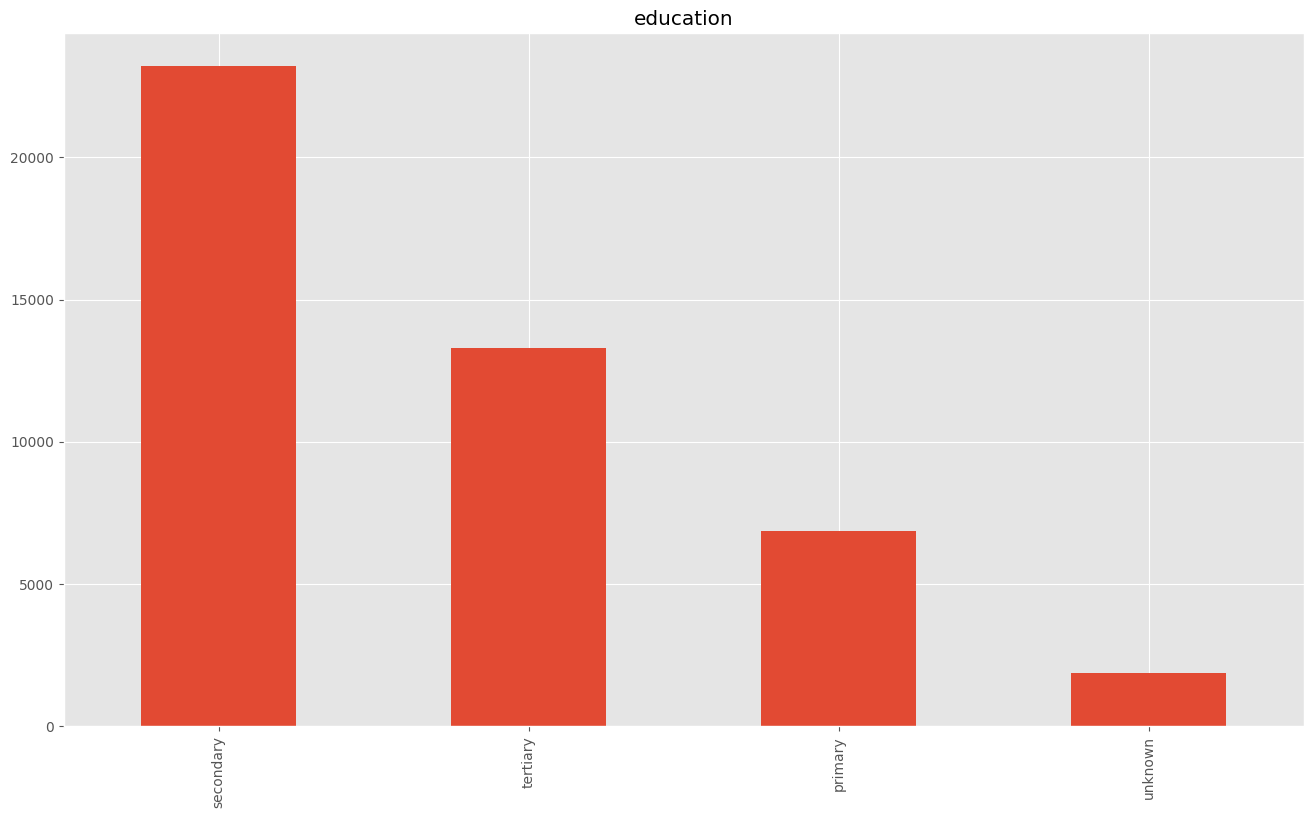

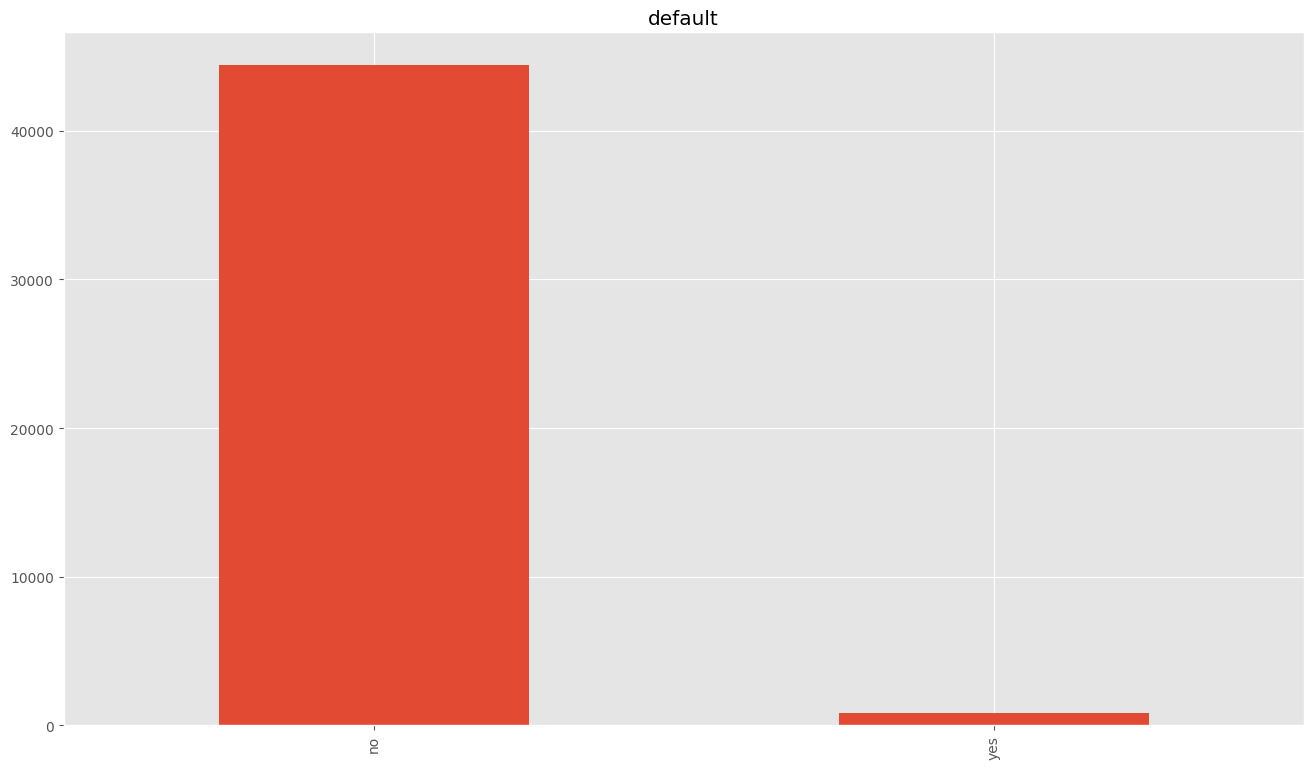

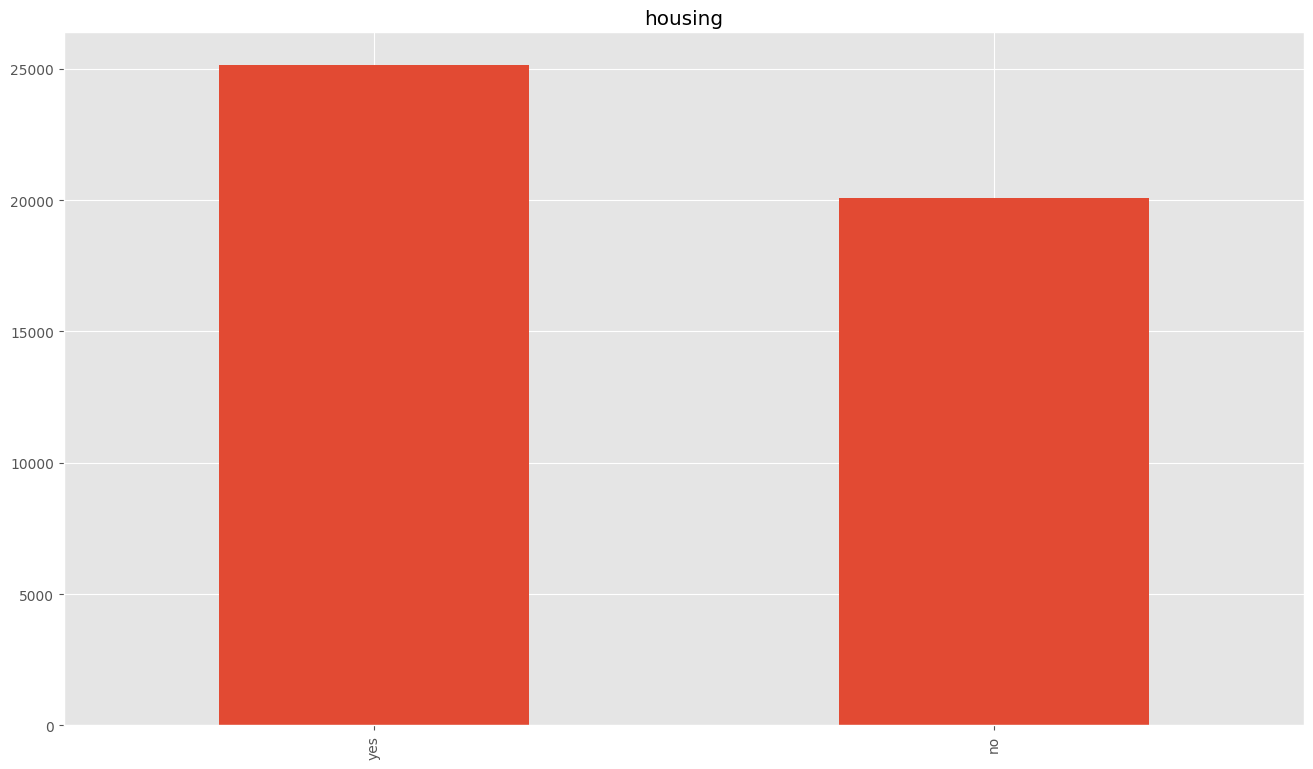

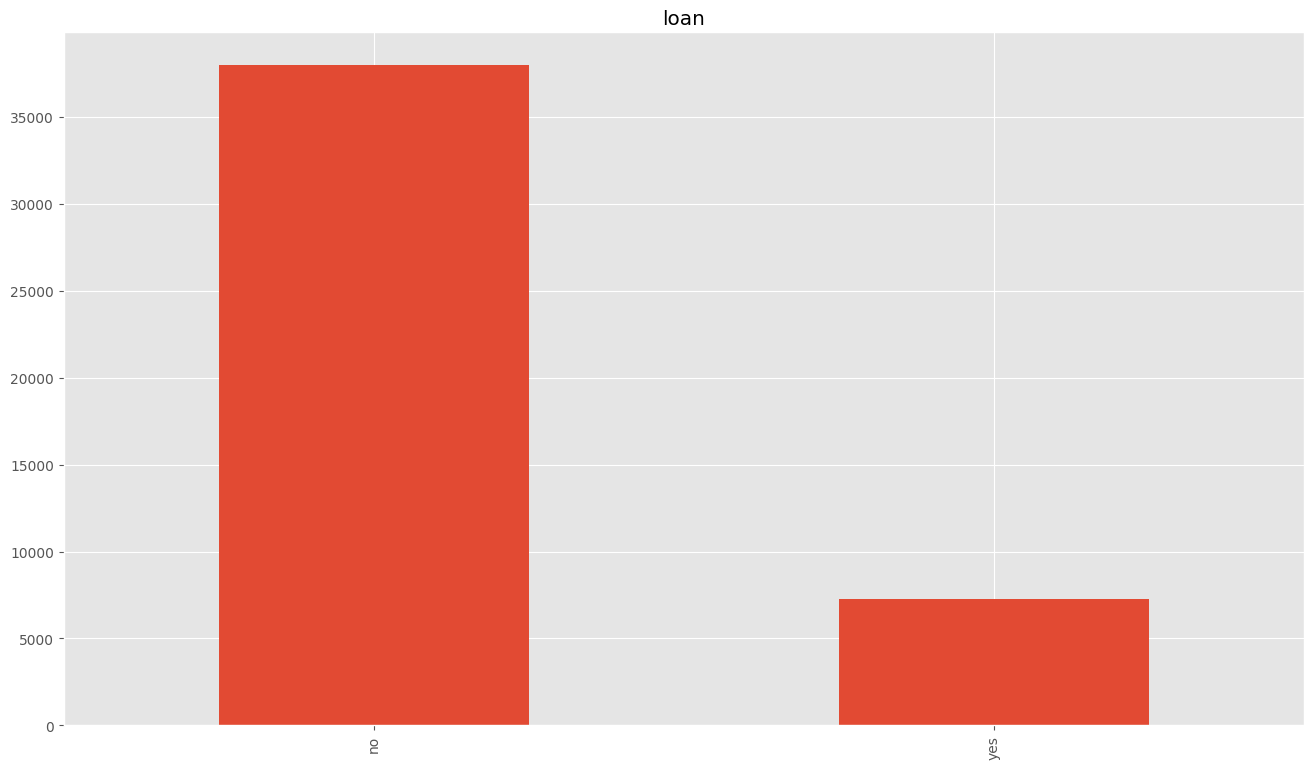

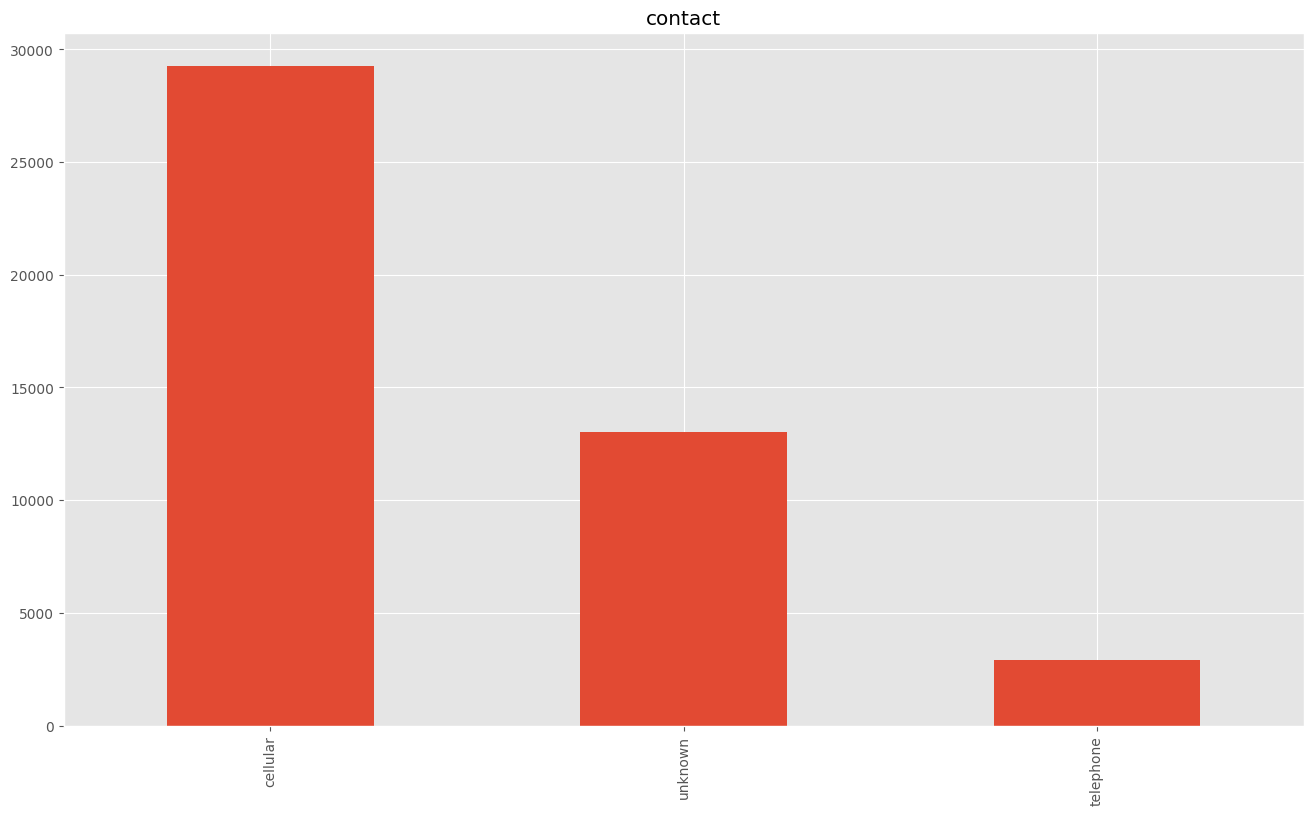

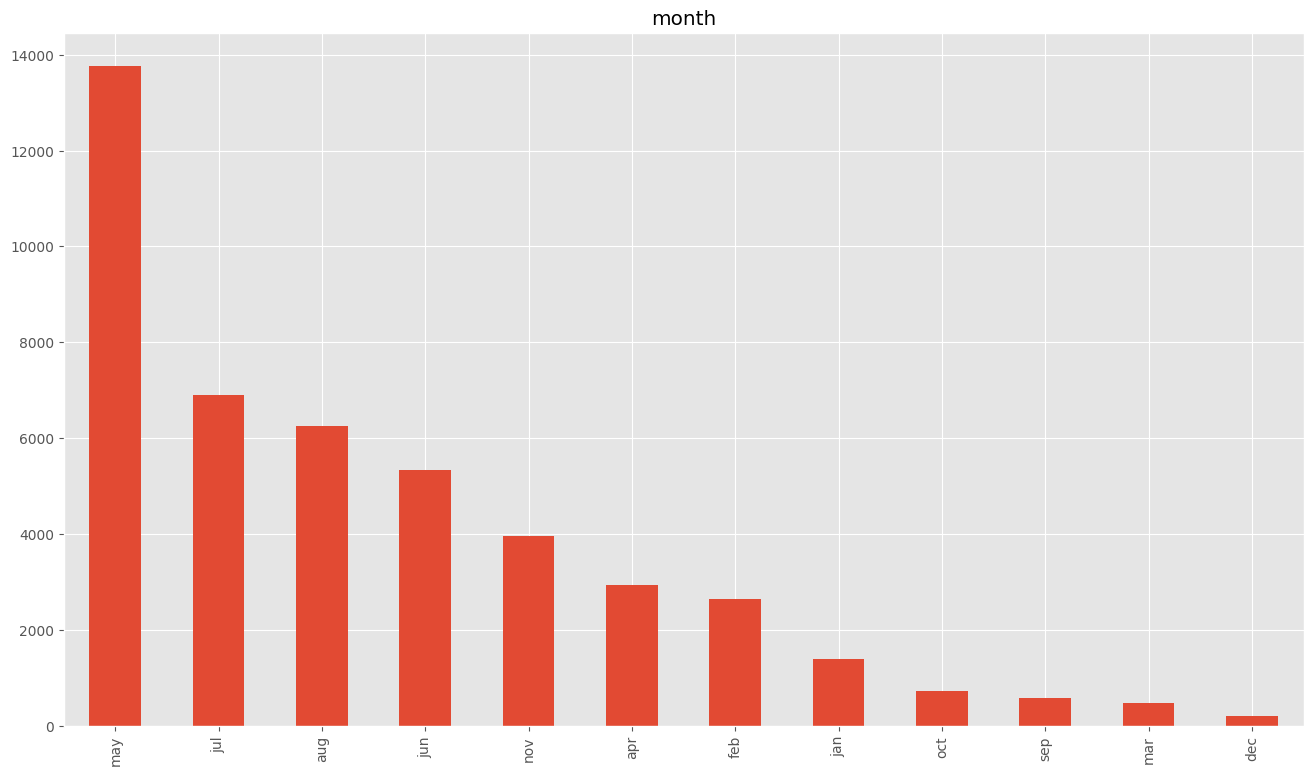

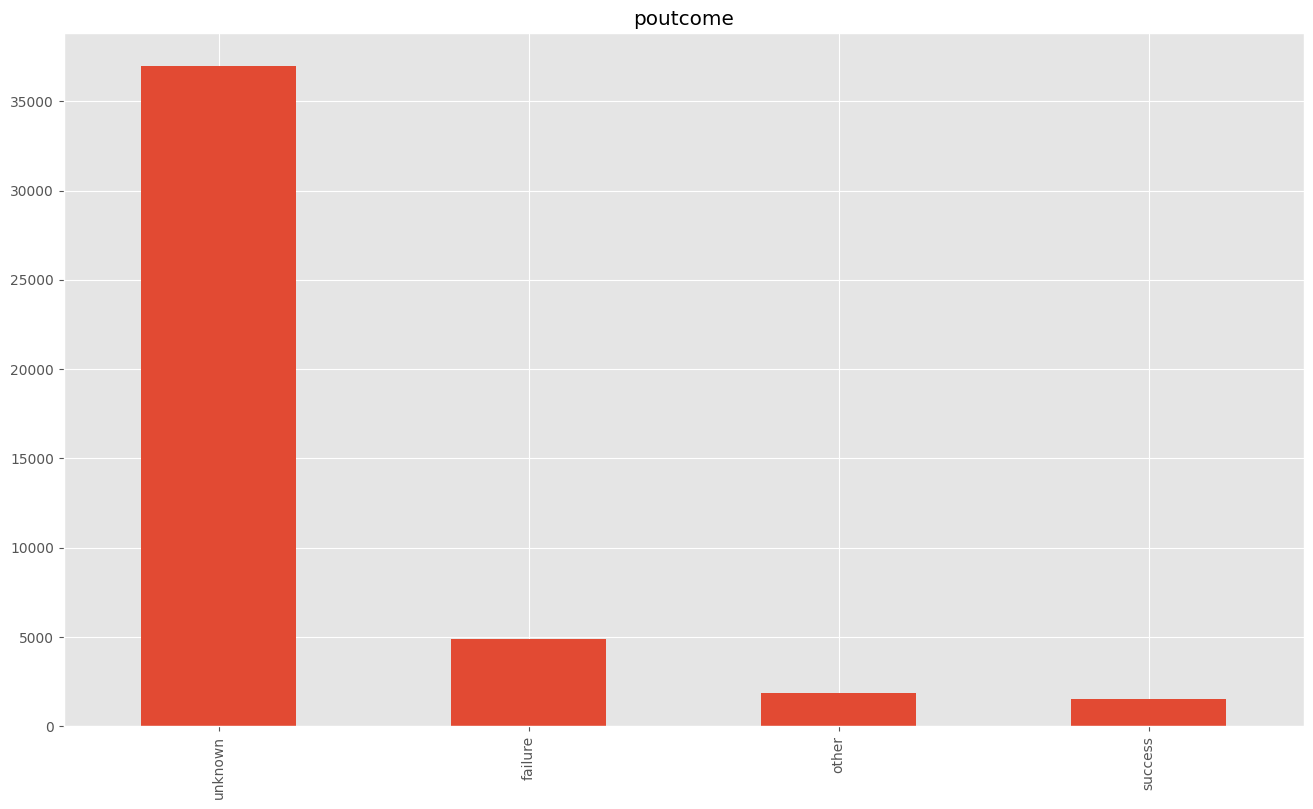

In [ ]:
categoricos = [col for col in dataframe.columns if dataframe[col].dtype == 'object' and col!= 'y'] # obteniendo los datos categoricos

# Mostrar los gráficos de barras para cada columna categórica
for col in categoricos:
      fig, ax = plt.subplots()
      dataframe[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()

Codificar los valores categoricos para que queden en números

In [ ]:
encoder=LabelEncoder()
# Obtener columnas a encodificar
cat_colsAll = [col for col in dataframe.columns if dataframe[col].dtype == 'object']

for col in cat_colsAll:
        dataframe[col] = encoder.fit_transform(dataframe[col])

Dividir los datos

In [ ]:
dataNumerica = dataframe.select_dtypes(np.number) # obtener columnas numericas
dataCategorica = dataframe.select_dtypes(object)

Normalizar

In [ ]:
escalador=StandardScaler()
dataNumerica2=pd.DataFrame(escalador.fit_transform(dataNumerica), columns = dataNumerica.columns)

In [ ]:
dataNumerica2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898,-0.363983


Modificar datos numéricos

In [ ]:
dataNumerica2 = dataNumerica2.round() # redondear los valores
dataNumerica2.head() #visualizar como quedaron los datos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2.0,-0.0,-0.0,1.0,-0.0,0.0,1.0,-0.0,2.0,-1.0,1.0,0.0,-1.0,-0.0,-0.0,0.0,-0.0
1,0.0,1.0,1.0,-0.0,-0.0,-0.0,1.0,-0.0,2.0,-1.0,1.0,-0.0,-1.0,-0.0,-0.0,0.0,-0.0
2,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0,1.0,2.0,2.0,-1.0,1.0,-1.0,-1.0,-0.0,-0.0,0.0,-0.0
3,1.0,-1.0,-0.0,2.0,-0.0,0.0,1.0,-0.0,2.0,-1.0,1.0,-1.0,-1.0,-0.0,-0.0,0.0,-0.0
4,-1.0,2.0,1.0,2.0,-0.0,-0.0,-1.0,-0.0,2.0,-1.0,1.0,-0.0,-1.0,-0.0,-0.0,0.0,-0.0


In [ ]:
dataNumerica2= dataNumerica2.astype(int) # Convertir los valores a enteros
dataNumerica2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,0,0,1,0,0,1,0,2,-1,1,0,-1,0,0,0,0
1,0,1,1,0,0,0,1,0,2,-1,1,0,-1,0,0,0,0
2,-1,-1,0,0,0,0,1,2,2,-1,1,-1,-1,0,0,0,0
3,1,-1,0,2,0,0,1,0,2,-1,1,-1,-1,0,0,0,0
4,-1,2,1,2,0,0,-1,0,2,-1,1,0,-1,0,0,0,0


Unir datos numéricos y categoricos

In [ ]:
dataframe = pd.concat([dataNumerica2,dataCategorica], axis = 1) # combinar los datos categóricos y numéricos

Visualizar los datos con los cambios

In [ ]:
dataframe.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,0,0,1,0,0,1,0,2,-1,1,0,-1,0,0,0,0
1,0,1,1,0,0,0,1,0,2,-1,1,0,-1,0,0,0,0
2,-1,-1,0,0,0,0,1,2,2,-1,1,-1,-1,0,0,0,0
3,1,-1,0,2,0,0,1,0,2,-1,1,-1,-1,0,0,0,0
4,-1,2,1,2,0,0,-1,0,2,-1,1,0,-1,0,0,0,0
5,-1,0,0,1,0,0,1,0,2,-1,1,0,-1,0,0,0,0
6,-1,0,1,1,0,0,1,2,2,-1,1,0,-1,0,0,0,0
7,0,-1,-2,1,7,0,1,0,2,-1,1,0,-1,0,0,0,0
8,2,0,0,-2,0,0,1,0,2,-1,1,-1,-1,0,0,0,0
9,0,1,1,0,0,0,1,0,2,-1,1,-1,-1,0,0,0,0


Asignación de variables para X y Y

In [ ]:
X=dataframe.drop(["y"],axis=1) # obtener valores de x
y=dataframe["y"] # valores de y
print(X.shape)
print(X)
print("----")
print(y.shape)
print(y)

(45211, 16)
       age  job  marital  education  default  balance  housing  loan  contact  \
0        2    0        0          1        0        0        1     0        2   
1        0    1        1          0        0        0        1     0        2   
2       -1   -1        0          0        0        0        1     2        2   
3        1   -1        0          2        0        0        1     0        2   
4       -1    2        1          2        0        0       -1     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206    1    1        0          1        0        0       -1     0       -1   
45207    3    0       -2         -2        0        0       -1     0       -1   
45208    3    0        0          0        0        1       -1     0       -1   
45209    2   -1        0          0        0        0       -1     0        0   
45210    0   -1        0          0        0        1       -1     0       -1   

       day  mon

Buscar el mejor valor de suavizado para reducir o eliminar overfitting y underfitting

In [ ]:
# definimos el modelo
modelo = GaussianNB()

# valores de probar
alphas = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# definimos la búsqueda por validación cruzada
grid = GridSearchCV(estimator=modelo, param_grid=alphas, cv=5)

# ajustamos el modelo a los datos
grid.fit(X, y)

print(f"El mejor valor de var_smoothing es: {grid.best_params_['var_smoothing']}")
print(f'Precisión media en validación cruzada: {grid.best_score_}')

El mejor valor de var_smoothing es: 1e-09
Precisión media en validación cruzada: 0.7665799199738828


PARTICIÓN DE DATOS  80% 20%

In [ ]:
XTrainNaive,XTestNaive,yTrainNaive,yTestNaive=train_test_split(X,y,test_size=0.2, random_state=2)

Implementación modelo

In [ ]:
modeloNaive=GaussianNB(var_smoothing=1e-09)
modeloNaive.fit(XTrainNaive,yTrainNaive)
yPredictNaive=modeloNaive.predict(XTestNaive)
print(yPredictNaive)

[3 0 0 ... 0 3 0]


Identificar overfitting o underfitting del modelousando Vaidación Cruzada

In [ ]:
scores = cross_val_score(modeloNaive, X, y, cv=5)

# calcular la media y la desviación estándar de las puntuaciones de precisión
mean_score = np.mean(scores)
std_score = np.std(scores)

# hacer predicciones en los datos de entrenamiento y prueba
y_pred_train = modeloNaive.predict(XTrainNaive)
y_pred_test = modeloNaive.predict(XTestNaive)

# calcular la precisión en los datos de entrenamiento y prueba
accuracy_train = accuracy_score(yTrainNaive, y_pred_train)
accuracy_test = accuracy_score(yTestNaive, y_pred_test)

print("Precisión en los datos de entrenamiento:", accuracy_train)
print("Precisión en los datos de prueba:", accuracy_test)

# imprimir las puntuaciones de precisión y sus estadísticas
print('Puntuaciones de precisión:', scores)
print('Precisión media:', mean_score)
print('Desviación estándar de la precisión:', std_score)

Precisión en los datos de entrenamiento: 0.8366235346162354
Precisión en los datos de prueba: 0.8351210881344686
Puntuaciones de precisión: [0.92181798 0.90300818 0.71433311 0.72307012 0.57067021]
Precisión media: 0.7665799199738828
Desviación estándar de la precisión: 0.13093126040565595


Matriz de confusión

[[7086  904]
 [ 587  466]]


<Axes: >

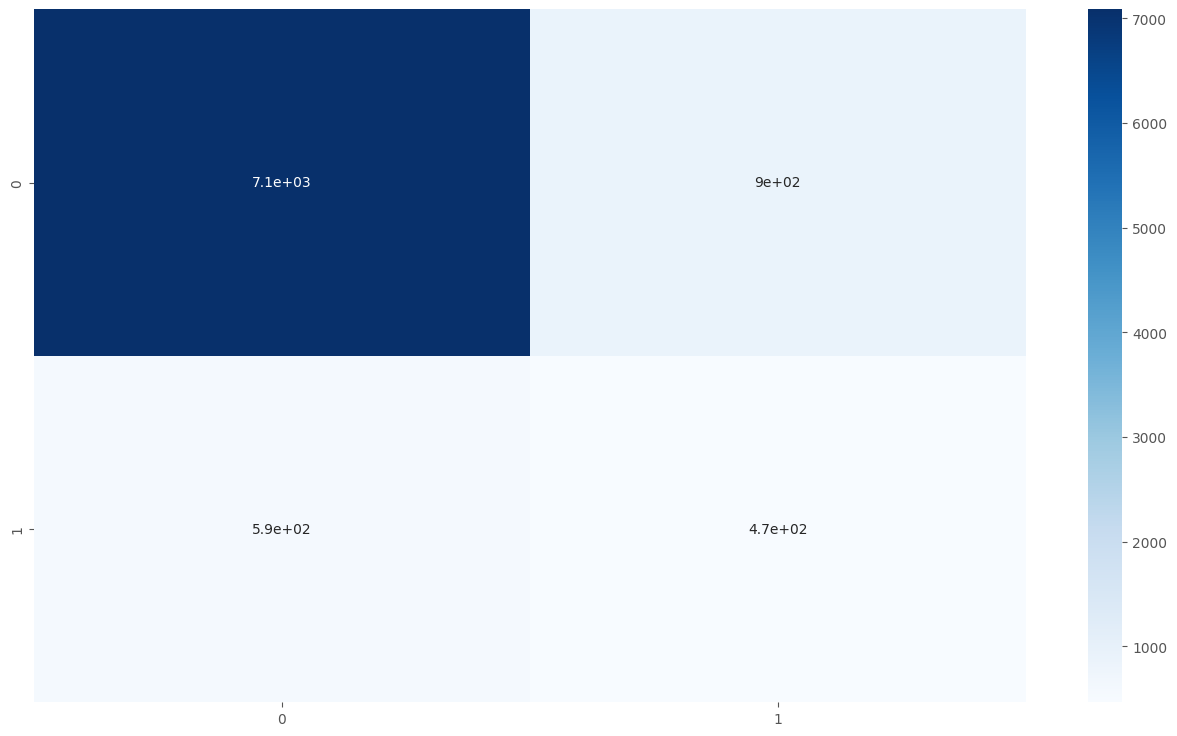

In [ ]:
matrizNaive=confusion_matrix(yTestNaive,yPredictNaive)
print(matrizNaive)
sb.heatmap(matrizNaive,annot=True,cmap="Blues")

Significado valores matriz de confusión

In [ ]:
vp = matrizNaive[0,0]
fp = matrizNaive[0,1]
fn = matrizNaive[1,0]
vn = matrizNaive[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print("Verdaderos Positivos = ", vp)
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print("Falsos Positivos = ", fp)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print("Falsos Negativos = ", fn)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print("Verdaderos Negativos = ", vn)

Verdaderos Positivos =  7086
Falsos Positivos =  904
Falsos Negativos =  587
Verdaderos Negativos =  466


Evaluación capacidad de clasificación correcta del modelo

In [ ]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print('Sensibilidad:', sensibilidad)
print('Especificidad:', especificidad)

Sensibilidad: 0.9234979799296233
Especificidad: 0.34014598540145985


Métricas

In [ ]:
precision_recall_fscore_support(yTestNaive,yPredictNaive,average=None, zero_division=True)
etiquetas=["yes","no"]
print(classification_report(yTestNaive,yPredictNaive,target_names=etiquetas, zero_division=True))
acc_nb = accuracy_score(y_true=yTestNaive, y_pred=yPredictNaive)

              precision    recall  f1-score   support

         yes       0.92      0.89      0.90      7990
          no       0.34      0.44      0.38      1053

    accuracy                           0.84      9043
   macro avg       0.63      0.66      0.64      9043
weighted avg       0.86      0.84      0.84      9043



In [ ]:
accuracy = accuracy_score(yTestNaive, yPredictNaive) # proporción de predicciones correctas del modelo
precision = precision_score(yTestNaive,yPredictNaive, average = 'weighted',zero_division= True ) # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestNaive, yPredictNaive, average = 'weighted', zero_division= True) # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestNaive, yPredictNaive, average = 'weighted') # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8351210881344686
Precision: 0.8555703397396249
Recall: 0.8351210881344686
F1 Score: 0.8442381311149959


PARTICIPACIÓN 75% 25%

In [ ]:
XTrainNaive2,XTestNaive2,yTrainNaive2,yTestNaive2=train_test_split(X,y,test_size=0.3, random_state=2, stratify=y)

Implementación modelo

In [ ]:
modeloNaive2=GaussianNB(var_smoothing=1e-09)
modeloNaive2.fit(XTrainNaive2,yTrainNaive2)
yPredictNaive2=modeloNaive2.predict(XTestNaive2)
print(yPredictNaive2)

[0 0 3 ... 0 0 3]


Identificar overfitting o underfitting en el modelo usando Validación cruzada

In [ ]:
scores = cross_val_score(modeloNaive2, X, y, cv=5)

# calcular la media y la desviación estándar de las puntuaciones de precisión
mean_score = np.mean(scores)
std_score = np.std(scores)

# hacer predicciones en los datos de entrenamiento y prueba
y_pred_train = modeloNaive2.predict(XTrainNaive2)
y_pred_test = modeloNaive2.predict(XTestNaive2)

# calcular la precisión en los datos de entrenamiento y prueba
accuracy_train = accuracy_score(yTrainNaive2, y_pred_train)
accuracy_test = accuracy_score(yTestNaive2, y_pred_test)

print("Precisión en los datos de entrenamiento:", accuracy_train)
print("Precisión en los datos de prueba:", accuracy_test)

# imprimir las puntuaciones de precisión y sus estadísticas
print('Puntuaciones de precisión:', scores.mean())
print('Precisión media:', mean_score)
print('Desviación estándar de la precisión:', std_score)

Precisión en los datos de entrenamiento: 0.8369197712263405
Precisión en los datos de prueba: 0.8381008552049543
Puntuaciones de precisión: 0.7665799199738828
Precisión media: 0.7665799199738828
Desviación estándar de la precisión: 0.13093126040565595


Métricas

Matriz de confusión

[[10675  1302]
 [  894   693]]


<Axes: >

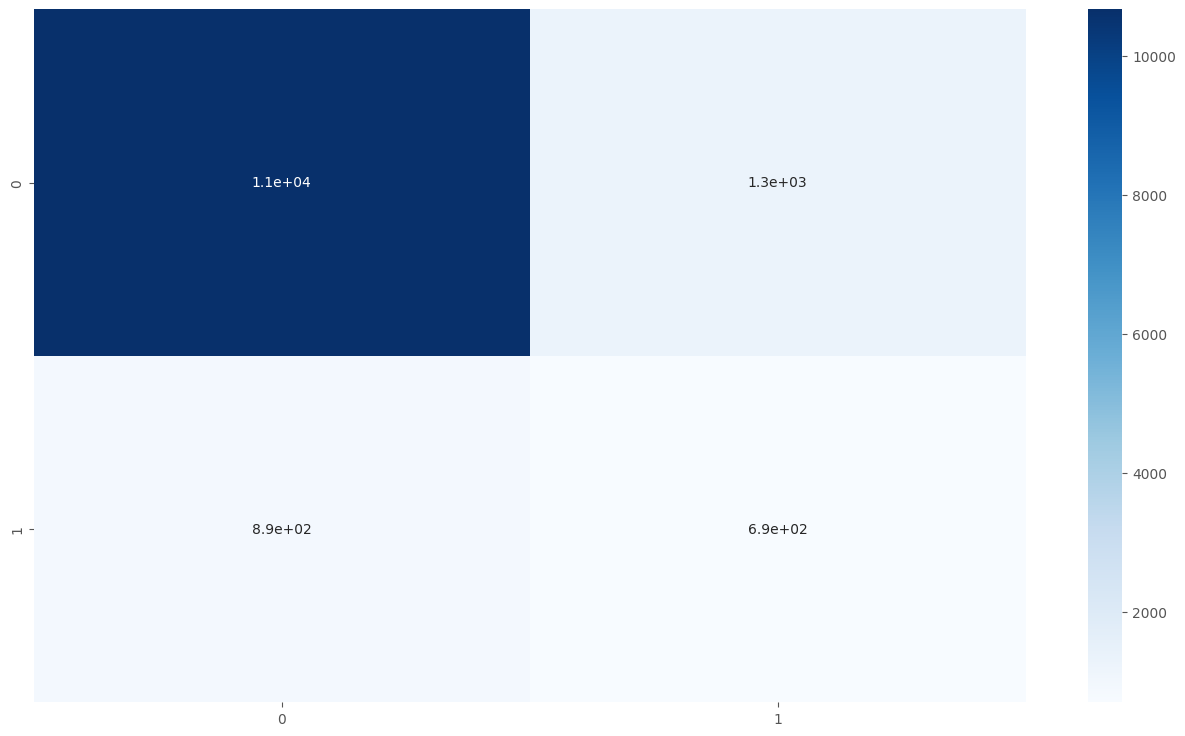

In [ ]:
matrizNaive2=confusion_matrix(yTestNaive2,yPredictNaive2)
print(matrizNaive2)
sb.heatmap(matrizNaive2,annot=True,cmap="Blues")

Significado valores matriz de confusión

In [ ]:
vp = matrizNaive2[0,0]
fp = matrizNaive2[0,1]
fn = matrizNaive2[1,0]
vn = matrizNaive2[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print(f'Verdaderos Positivos =  {vp}')
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print(f'Falsos Positivos =  {fp}')
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print(f'Falsos Negativos = {fn}')
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print(f'Verdaderos Negativos = {vn}')

Verdaderos Positivos =  10675
Falsos Positivos =  1302
Falsos Negativos = 894
Verdaderos Negativos = 693


Evaluación capacidad de clasificación correcta del modelo

In [ ]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print(f'Sensibilidad: {sensibilidad}')
print(f'Especificidad: {especificidad}')

Sensibilidad: 0.9227245224306336
Especificidad: 0.3473684210526316


Resumen de métricas

In [ ]:
precision_recall_fscore_support(yTestNaive2,yPredictNaive2,average=None)
etiquetas=["yes","no"]
print(classification_report(yTestNaive2,yPredictNaive2,target_names=etiquetas))

              precision    recall  f1-score   support

         yes       0.92      0.89      0.91     11977
          no       0.35      0.44      0.39      1587

    accuracy                           0.84     13564
   macro avg       0.64      0.66      0.65     13564
weighted avg       0.86      0.84      0.85     13564



In [ ]:
accuracy = accuracy_score(yTestNaive2, yPredictNaive2) # proporción de predicciones correctas del modelo
precision = precision_score(yTestNaive2, yPredictNaive2, average = 'weighted') # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestNaive2, yPredictNaive2, average = 'weighted') # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestNaive2, yPredictNaive2, average = 'weighted') # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(type(f1.item()))

Accuracy: 0.8381008552049543
Precision: 0.8554073495548676
Recall: 0.8381008552049543
F1 Score: 0.8459185653124017
<class 'float'>


Al comparar las métricas, da mejores resultados el modelo de Bayes que tiene

# CONCLUSIÓN

Es mejor el modelo 2 debido a que tiene mayor precisión, lo que significa que es capaz de tener un mayor porcentaje de predicciones positivas correctas